# <Project_Title>
## STAT 301: Statistical Modelling for Data Science

### Group 33: 
- Lexie Wen
- Marylyn Yuwono
- Xinghao Huang
- Zhenyu Zhong

### Date: December 6, 2025
---

## Introduction

- Background Information: 

- Research Question: How are listing characteristics (e.g. room type, host is superhost or not), location features (e.g.distance to metro station, distance to city center) and booking timing (weekday or weekend) associated with the full price of airbnb accommodation for two people and two nights in Athens (response)?

- The primary goal of this question is inference.
---

## Methods and Results

### a) Data

Reproducible Code

In [17]:
# Load Athens Airbnb datasets from GitHub URLs of my repository
athens_weekdays <- read.csv("https://raw.githubusercontent.com/XH-DP3/Airbnb-Price-Analysis-in-Athens/refs/heads/main/data/athens_weekdays.csv", header = TRUE)
athens_weekends <- read.csv("https://raw.githubusercontent.com/XH-DP3/Airbnb-Price-Analysis-in-Athens/refs/heads/main/data/athens_weekends.csv", header = TRUE)

Citation of the Original Source

- Gyódi, K., & Nawaro, Ł. (2021, March 25). Determinants of Airbnb prices in European cities: A Spatial Econometrics Approach (supplementary material). Zenodo. https://zenodo.org/records/4446043#.Y9Y9ENJBwUE 

Data Collection Information: 
- The datasets were originally obtained from Gyódi and Nawaro (2021), Determinants of Airbnb Prices in European Cities: A Spatial Econometrics Approach (supplementary material), published on Zenodo.

- The data were collected from Airbnb listings across multiple European cities, focusing on listing attributes, host information, and spatial factors affecting pricing.

- The data were **observational** since the variables were collected from Airbnb listings without any treatment assignment or random process.

- This dataset offers a detailed overview of Airbnb prices in Athens, including information on room type, cleanliness and satisfaction ratings, number of bedrooms, distance from the city centre, and other attributes that help explain price differences between weekday and weekend stays.

Variable Summary

| Variable | Type | Description |
|-----------|-----------|-----------|
| realSum | Quantitative data | the total prices of the listing |
| room_type | Categorical/nominal data | different room types, including *private*, *shared*, *entire home*, *apt*. |
| room_shared | Categorical/binary data| whether a room is shared |
| room_private | Categorical/binary data | whether a room is private |
| person_capacity | Quantitative data | number of people a room can accommodate |
| host_is_superhost | Categorical/binary data | whether a host is a superhost |
| multi | Categorical/binary data | whether the listing is for multiple rooms |
| biz| Categorical/binary data | whether an observation is associated with a business |
| cleanliness_rating | Quantitative data | rating of cleanliness |
| guest_satisfaction_overall | Quantitative data | overall rating from guests comparing all listings offered by the host |
| bedrooms | Quantitative data | number of bedrooms |
| dist | Quantitative data | distance from city center |
| metro_dist | Quantitative data | distance from the nearest metro station |
| attr_index | Quantitative data | attr index |
| attr_index_norm | Quantitative data | normalized attr index |
| rest_index | Quantitative data | rest index |
| rest_index_norm | Quantitative data | normalized rest index |
| lng | Quantitative data | longitude coordiates for location identification |
| lat | Quantitative data | latitude coordiates for location identification |


Preselection of Variables

- ***room_shared***, ***room_private***, and ***multi*** have redundant information because we can also acquire the same and even more complete information from ***room_type*** and ***bedrooms***.

- ***lng*** and ***lat*** will be dropped because they only provide raw spatial coordinates, and information regarding distance can be acquired from ***dist*** and ***metro_dist***

- ***attr_index***, ***attr_index_norm***, ***rest_index***, and ***rest_index_norm*** will also be dropped because their definitions and interpretations are unclear from the dataset documentation, and they seem like post-analysis results.

### b) Exploratory Data Analysis

In [ ]:
# Load necessary libraries
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("patchwork")

library(tidyverse)
library(ggplot2)
library(patchwork)


The downloaded binary packages are in
	/var/folders/z2/0v9m6dxx6bnbxcv2q29tp4br0000gn/T//Rtmplojg6Q/downloaded_packages

The downloaded binary packages are in
	/var/folders/z2/0v9m6dxx6bnbxcv2q29tp4br0000gn/T//Rtmplojg6Q/downloaded_packages

The downloaded binary packages are in
	/var/folders/z2/0v9m6dxx6bnbxcv2q29tp4br0000gn/T//Rtmplojg6Q/downloaded_packages


Data Wrangling

In [20]:
# Add an indicator column 'day_type' to each dataset
athens_weekdays <- athens_weekdays %>% mutate(day_type = as.factor("Weekdays"))
athens_weekends <- athens_weekends %>% mutate(day_type = as.factor("Weekends"))

# Combine the two datasets into one
athens <- rbind(athens_weekdays, athens_weekends)

Visualization 1

In [27]:
summary(athens$realSum)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   42.88    98.66   127.72   151.74   171.54 18545.45 

Note that there are potentially extreme outliers in ***realSum***. They will make it harder to see the pattern of the majority of individual observations. Therefore, we are going to filter them out to have a better view for the visualization. 

The values within the whiskers, [Q1 - 1.5IQR, Q3 + 1.5IQR], are included, which are the non-outlier observations among the original values of ***realSum***.

In [ ]:
# filter the data
realSum_within_range <- athens %>%
    group_by(room_type, day_type) %>%
    filter( (realSum >= quantile(realSum,0.25)-1.5*IQR(realSum)) & (realSum <= quantile(realSum,0.75)+1.5*IQR(realSum)) ) %>%
    ungroup() %>%
    select(realSum, day_type, room_type, dist) # these 4 variables will be used for the EDA visualization(s)


In [30]:
# boxplot with original realSum values
box_price_by_room_original <- athens %>%
    ggplot(aes(x = day_type, y = realSum, fill = day_type)) +
    geom_boxplot(fatten = 4) + # adjust the width of the median bar
    geom_jitter(color="gray", size=0.4, alpha=0.6) + # adding individual observations
    facet_grid(~room_type) + # facet by room_type
    ggtitle("Unfiltered Airbnb Prices Distribution per Room/Day Type") +
    labs(x = "Day Types", y = "Unfiltered Airbnb Price in Athens", fill = "Day Type")


# boxplot with filtered realSum values
box_price_by_room_filtered <- realSum_within_range %>%
    ggplot(aes(x = day_type, y = realSum, fill = day_type)) +
    geom_boxplot(fatten = 4) + # adjust the width of the median bar
    geom_jitter(color="gray", size=0.4, alpha=0.6) + # adding individual observations
    facet_grid(~room_type) + # facet by room_type
    ggtitle("Filtered Airbnb Prices Distribution per Room/Day Type") +
    labs(x = "Day Types", y = "Filtered Airbnb Price in Athens", fill = "Day Type")

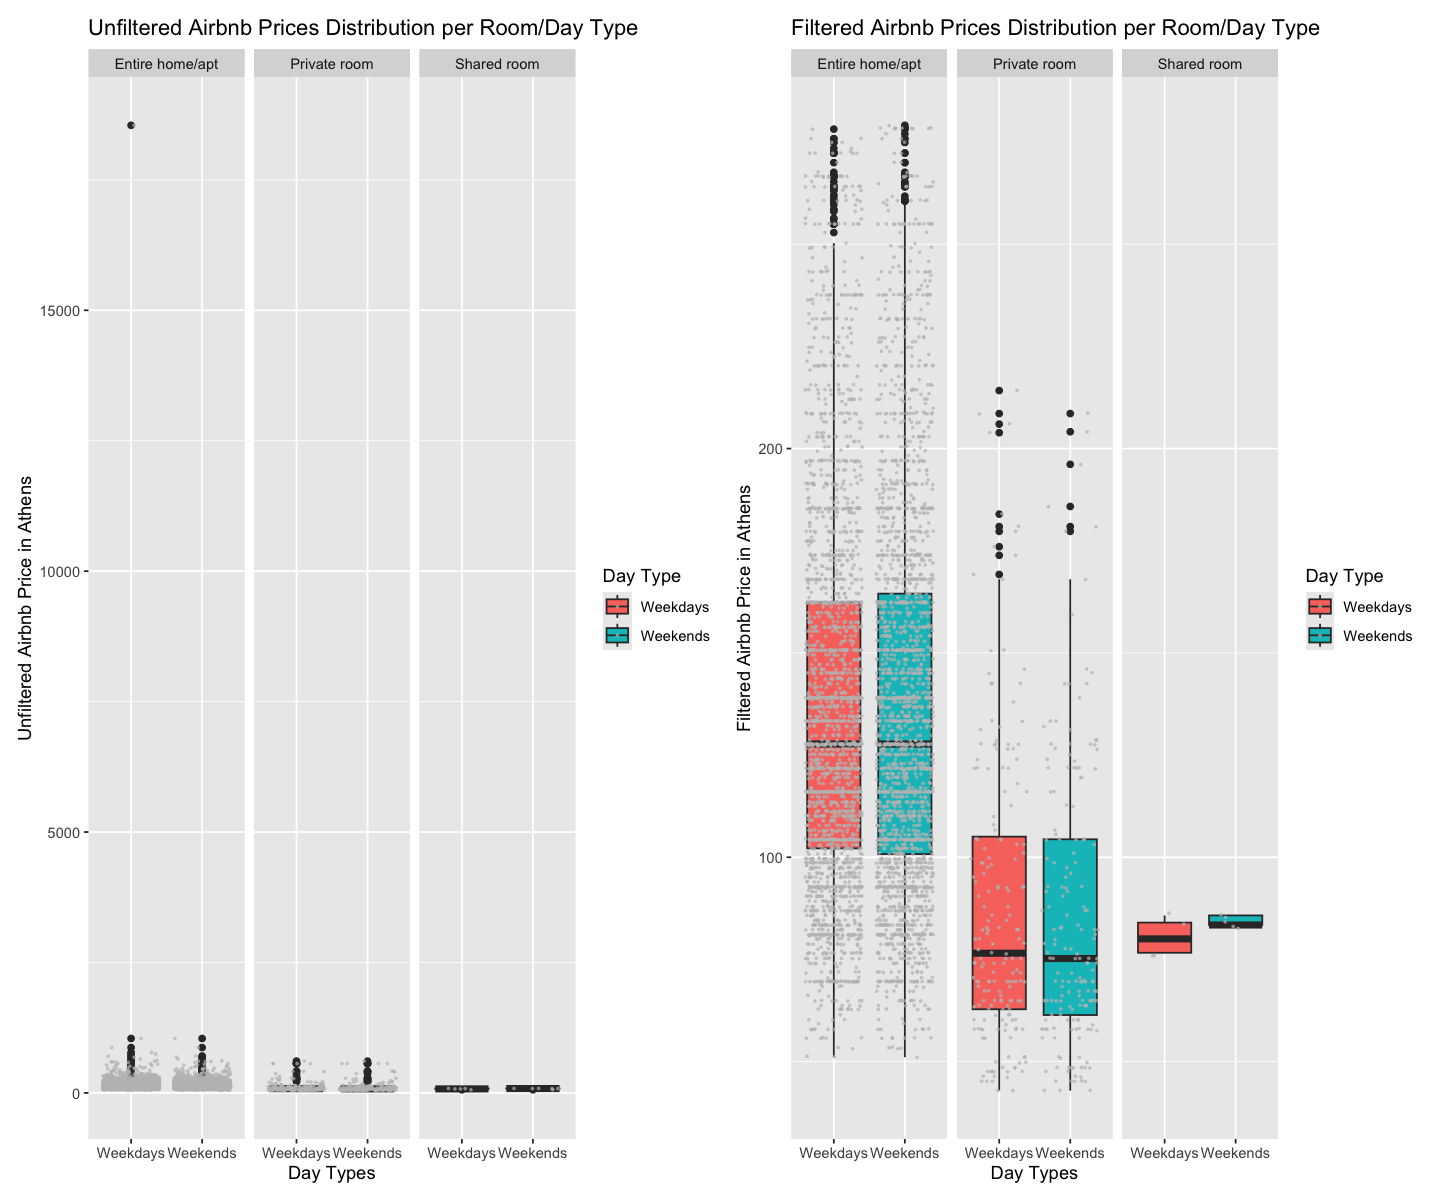

In [32]:
# Adjust plot size for better visibility
options(repr.plot.width = 12, repr.plot.height = 10)

# Display the two boxplots side by side for comparison
box_price_by_room_original + box_price_by_room_filtered

Visualization 2

### c) Methods: Plan

### d) Code and Results

---

## Discussion

---

## References